# Praca domowa 6

In [31]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_olivetti_faces

## Wczytanie danych

In [3]:
data = fetch_olivetti_faces(return_X_y=False)

In [4]:
images = data.images
images.shape # 400 obrazów o wymiarach 64x64

(400, 64, 64)

In [5]:
X = data.data
X.shape # jak images, ale obrazy są rozwinięte

(400, 4096)

In [6]:
def plot_faces(data, n_faces=4):
    _, axes = plt.subplots(nrows=1, ncols=n_faces, figsize=(10, 3))
    for ax, image in zip(axes, data):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

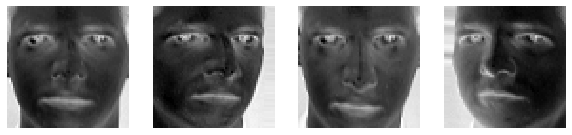

In [7]:
plot_faces(images)

## Kompresja

In [8]:
X = StandardScaler().fit_transform(X)

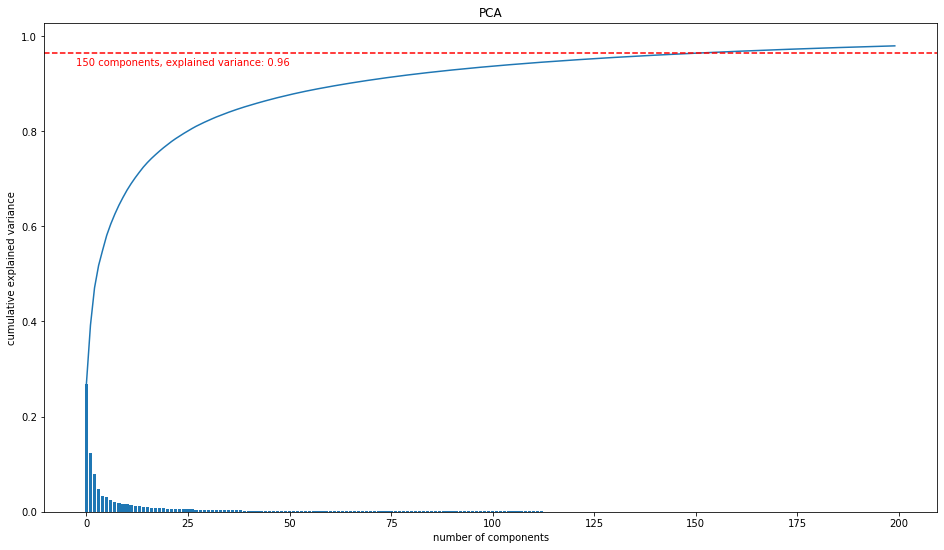

In [80]:
pca = PCA(random_state=1)
pca.fit(X)
explained_variance = pca.explained_variance_ratio_
n = 200
m = 150
m_comp_explained_variance = np.sum(explained_variance[0:m+1])

plt.rcParams["figure.figsize"] = [16,9]
plt.plot(np.cumsum(explained_variance[0:n]))
plt.bar(np.arange(n), explained_variance[0:n])
plt.axhline(y=m_comp_explained_variance, color="r", linestyle="dashed")
plt.text(50,m_comp_explained_variance-0.02, 
         str(m) + " components, explained variance: " + "{:.2f}".format(m_comp_explained_variance), 
         color="red", 
        ha="right", va="center")
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance");
plt.title("PCA")
plt.show()

In [81]:
pca = PCA(n_components = 150, random_state=1)
X_pca = pca.fit_transform(X)
X_hat = np.dot(X_pca, pca.components_) + pca.mean_

In [82]:
print(f"Compress ratio: {4096/150:.2f}")

Compress ratio: 27.31


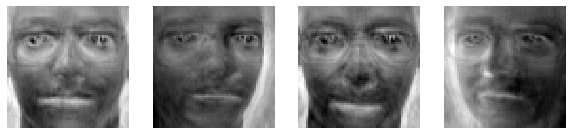

In [83]:
plot_faces(X_hat.reshape(400, 64, 64))

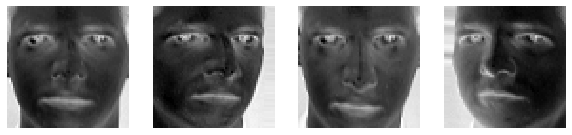

In [84]:
plot_faces(images)

In [49]:
def get_errors(X, X_hat):
    errors = np.zeros(X.shape[0])
    for i in range(len(errors)):
        errors[i] = mean_squared_error(X[i], X_hat[i], squared=False)
    return errors

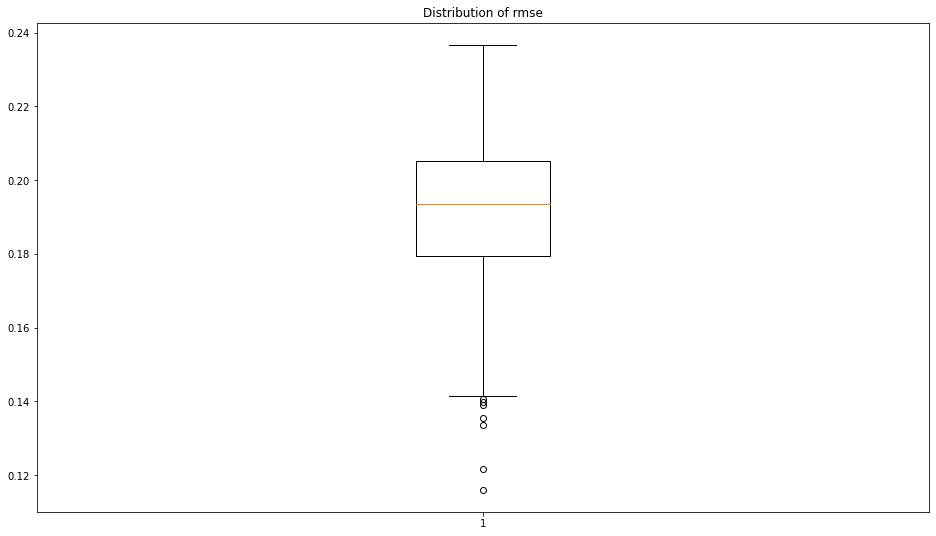

In [85]:
plt.boxplot(get_errors(X, X_hat))
plt.title("Distribution of rmse")
plt.show()